In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

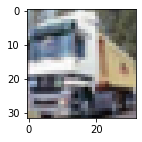

In [ ]:

plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
def plot_sam(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

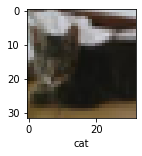

In [ ]:
plot_sam(X_train, y_train,9)

In [ ]:
#we need to normalize the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
32*32*3

3072

In [ ]:
28*28

784

In [ ]:
#Build ANN

ann = models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000,activation='relu'),
      layers.Dense(1000,activation='relu'),
      layers.Dense(10,activation ='sigmoid')])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.8141 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6251 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5427 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4829 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4307 - accuracy: 0.4955


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4733 - accuracy: 0.4726


[1.473284363746643, 0.4726000130176544]

In [ ]:
y_predict = ann.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_predict]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_classes)

Text(141.0, 0.5, 'Truth')

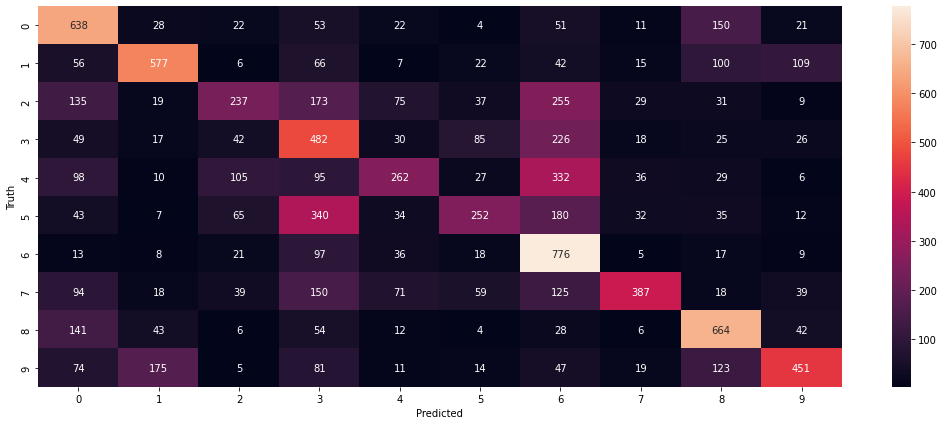

In [ ]:
import seaborn as sn
plt.figure(figsize = (18,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation = 'relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=64, kernel_size =(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')                   
])

cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.9965 - accuracy: 0.2795
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5776 - accuracy: 0.4352
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3981 - accuracy: 0.5010
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2989 - accuracy: 0.5387
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2202 - accuracy: 0.5700
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1561 - accuracy: 0.5925
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0962 - accuracy: 0.6157
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0462 - accuracy: 0.6336
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0001 - accuracy: 0.6491
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0403 - accuracy: 0.6395


[1.0402716398239136, 0.6395000219345093]

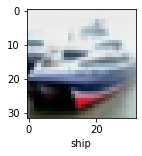

In [ ]:
plot_sam(X_test,y_test,1)

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
y_predict = cnn.predict(X_test)
y_predict[:10]

array([[2.87068915e-02, 7.60883093e-03, 1.25837445e-01, 4.23779488e-01,
        2.74287276e-02, 2.81717360e-01, 2.90304441e-02, 2.14903429e-02,
        4.68142852e-02, 7.58620352e-03],
       [6.37797639e-02, 2.20662296e-01, 3.74465526e-05, 1.45391068e-05,
        8.09012454e-06, 1.03782656e-06, 1.65401889e-05, 4.14666920e-06,
        7.03794897e-01, 1.16812373e-02],
       [1.62845507e-01, 2.20132798e-01, 2.88131344e-03, 8.84777401e-04,
        7.31128559e-04, 1.63065895e-04, 1.05133564e-04, 1.19590340e-03,
        5.82773983e-01, 2.82864887e-02],
       [8.69461596e-01, 1.09045915e-02, 1.23183466e-02, 7.16100796e-04,
        5.23690192e-04, 5.23763883e-05, 5.03431293e-05, 1.73678243e-04,
        1.04634717e-01, 1.16446160e-03],
       [4.08391352e-05, 1.79506431e-04, 2.79033799e-02, 2.22822011e-01,
        2.62773305e-01, 2.93610021e-02, 4.50649112e-01, 2.50586920e-04,
        5.79733029e-03, 2.22962844e-04],
       [4.22082143e-03, 4.13522776e-03, 3.54017131e-02, 4.04583476e-02,
   

In [ ]:
y_classes = [np.argmax(element) for element in y_predict]

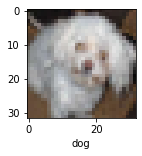

In [ ]:
plot_sam(X_test,y_test,1000)

In [ ]:
classes[y_classes[1000]]

'dog'

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_classes)

Text(141.0, 0.5, 'Truth')

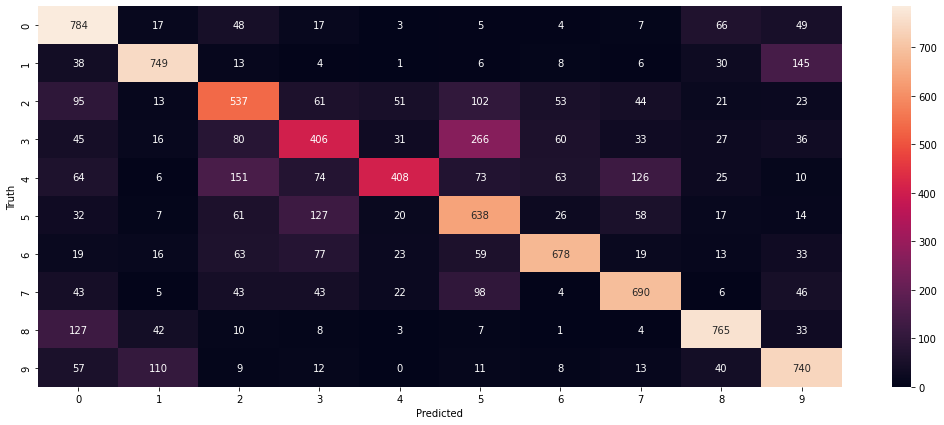

In [ ]:
import seaborn as sn
plt.figure(figsize = (18,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation = 'relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(filters=64, kernel_size =(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')                   
])


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

Try to run above code for other CNN composition, adding more layers or changing the number of filters and check if the accuracy is improved. Predict the corresponding results

